# 엠브레인 빅데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 파일 별로 알기 쉽게 변수 지정

In [2]:
x = pd.read_excel('data_info.xlsx')
y = ['a1','a2','a3','b1','b2','b3','b4','b5','b6','c1','c2','c3','c4','c5','c6']
z = pd.DataFrame(y,x['Unnamed: 3'])

In [24]:
z

,0
Unnamed: 3,
[PPDB] 패널 기초 조사 설문지.docx,a1
[PPDB] 패널 기초 조사 코드북.xlsx,a2
[PPDB] data.csv,a3
[PAYMENT] 데이터 정제_테이블명세서.xlsx,b1
[PAYMENT] 브랜드코드_추출.xlsx,b2
[PAYMENT] PAYMENT_201811.csv,b3
[PAYMENT] Summary_Brand.csv,b4
[PAYMENT] Summary_Category.csv,b5
[PAYMENT] Summary_Total.csv,b6


In [3]:
a3 = pd.read_csv('[PPDB] data.csv')

C:\Users\samsung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,416,417,418,419,420,421,422) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
a3.head()

,id,PP_date,X0001,X0002,X0003,X0004,X0005,X0006,X0007,X0008,...,M0018,M0019,M0020,M0021,M0022,M0023,M0024,M0025,M0026,M0027
0,A0000033,2019-01-11 17:49:19.873,2,5,10,5,1,1,2,6,...,0,0,0,0,0,0,0,0,0,0
1,A0000056,2018-07-18 10:08:35.563,2,4,7,4,14,4,2,2,...,0,0,1,0,0,0,0,0,0,0
2,A0000065,2018-11-16 09:41:46.077,2,4,7,4,1,1,2,6,...,0,0,1,0,0,0,0,0,0,0
3,A0000203,2019-01-07 21:53:37.613,2,4,7,4,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
4,A0000258,2018-09-13 14:18:11.850,1,4,7,4,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0


### 성별 확인

In [5]:
Man = a3[a3['X0001']==1]
Woman = a3[a3['X0001']==2]

In [6]:
Man['F0057'].value_counts()

0    27873
1    14578
Name: F0057, dtype: int64

In [7]:
Woman['F0057'].value_counts()

0    67725
1     5678
Name: F0057, dtype: int64

In [8]:
WomanSmoke = Woman[Woman['F0057']==1]
WomanSmokeX = Woman[Woman['F0057']==0]

## 온라인 쇼핑 여부 ( 남.녀 / 소득 / 소비대상 등... )

#### 주제 : 온라인 쇼핑 하는/안하는 사람들의 차이
#### ( 온라인 쇼핑 = 모바일 쇼핑 + 인터넷 쇼핑 + TV홈쇼핑 )

In [6]:
a3['ONLINE'] = a3[['I0025','I0026','I0027']].sum(axis=1)
ONLINE_X = a3[a3['ONLINE']==0] # 20999명
ONLINE_O = a3[a3['ONLINE']!=0] # 94855명

In [7]:
# 온라인 하는 사람 성비
ONLINE_O['X0001'].value_counts()  

2    63568
1    31287
Name: X0001, dtype: int64

In [8]:
# 온라인 안하는 사람 성비
ONLINE_X['X0001'].value_counts()  

1    11164
2     9835
Name: X0001, dtype: int64

Text(0.5,1,'Non-online Shoppers')

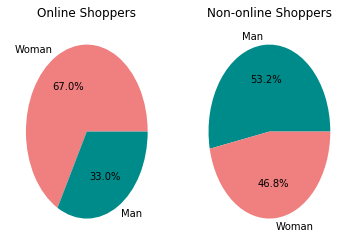

In [9]:
plt.subplot(1, 2, 1)
plt.pie(ONLINE_O['X0001'].value_counts(normalize=True),labels=['Woman','Man'],autopct='%1.1f%%',colors=['lightcoral','darkcyan'])
plt.title('Online Shoppers')

plt.subplot(1, 2, 2)
plt.pie(ONLINE_X['X0001'].value_counts(normalize=True),labels=['Man','Woman'],autopct='%1.1f%%',colors=['darkcyan','lightcoral'])
plt.title('Non-online Shoppers')

#### 온라인 하는/안하는 남&녀

In [10]:
ONLINE_O_Man = ONLINE_O[ONLINE_O['X0001']==1]
ONLINE_X_Man = ONLINE_X[ONLINE_X['X0001']==1]

ONLINE_O_Woman = ONLINE_O[ONLINE_O['X0001']==2]
ONLINE_X_Woman = ONLINE_X[ONLINE_X['X0001']==2]

In [11]:
print(len(ONLINE_O))
print(len(ONLINE_X))

94855
20999


In [12]:
# Online : 94855명
온라인유저대형몰 = ONLINE_O[['I0015','I0016','I0017','I0018','I0019']].sum(axis=1)>2
온라인유저편의점 = ONLINE_O[['I0020']].sum(axis=1)==1
온라인유저전문점 = ONLINE_O[['I0021','I0022']].sum(axis=1)>0
온라인유저전통시장 = ONLINE_O[['I0023','I0024']].sum(axis=1)>0
온라인유저해외직구 = ONLINE_O[['I0028']].sum(axis=1)==1
print('대형몰 이용하는 Online유저 비율 : ', 온라인유저대형몰.sum()/94855)
print('편의점 이용하는 Online유저 비율 : ', 온라인유저편의점.sum()/94855)
print('전문점 이용하는 Online유저 비율 : ', 온라인유저전문점.sum()/94855)
print('전통시장 이용하는 Online유저 비율 : ',온라인유저전통시장.sum()/94855)
print('해외직구 이용하는 Online유저 비율 : ', 온라인유저해외직구.sum()/94855)

대형몰 이용하는 Online유저 비율 :  0.35216910020557696
편의점 이용하는 Online유저 비율 :  0.8691160191871804
전문점 이용하는 Online유저 비율 :  0.5369458647409203
전통시장 이용하는 Online유저 비율 :  0.7645669706393969
해외직구 이용하는 Online유저 비율 :  0.18057034420958304


In [15]:
# 비Online : 20999명
비온라인유저대형몰 = ONLINE_X[['I0015','I0016','I0017','I0018','I0019']].sum(axis=1)>2
비온라인유저편의점 = ONLINE_X[['I0020']].sum(axis=1)==1
비온라인유저전문점 = ONLINE_X[['I0021','I0022']].sum(axis=1)>0
비온라인유저전통시장 = ONLINE_X[['I0023','I0024']].sum(axis=1)>0
비온라인유저해외직구 = ONLINE_X[['I0028']].sum(axis=1)==1
print('대형몰 이용하는 Non-Online유저 비율 : ', 비온라인유저대형몰.sum()/20999)
print('편의점 이용하는 Non-Online유저 비율 : ', 비온라인유저편의점.sum()/20999)
print('전문점 이용하는 Non-Online유저 비율 : ', 비온라인유저전문점.sum()/20999)
print('전통시장 이용하는 Non-Online유저 비율 : ',비온라인유저전통시장.sum()/20999)
print('해외직구 이용하는 Non-Online유저 비율 : ', 비온라인유저해외직구.sum()/20999)

대형몰 이용하는 Non-Online유저 비율 :  0.14505452640601935
편의점 이용하는 Non-Online유저 비율 :  0.6241725796466498
전문점 이용하는 Non-Online유저 비율 :  0.2429163293490166
전통시장 이용하는 Non-Online유저 비율 :  0.4361160055240726
해외직구 이용하는 Non-Online유저 비율 :  0.02704890709081385


### 온라인 쇼핑을 하는 사람의 경우, 온라인 쇼핑을 하지 않는 사람보다 다른 형태의 쇼핑(대형몰/편의점/전문점/전통시장/해외직구)또한 더 많이 하는 것으로 나왔다.
### ( 온라인 쇼핑이 다른 형태의 쇼핑의 대체재가 아닌 보완재의 성격을 띈다고 볼 수 있음 )

### 그 중 눈에 띄는 것 : 비온라인 유저의 43.6% 최근 3개월 동안 전통시장을 이용한적이 있으나, 이에 반해 온라인 유저의 경우에는 76.5%였다

### 대형몰,편의점,전문점,해외직구 등을 통해서 구할 수 있는 물품들은 주로 온라인 쇼핑을 통해서도 구할 수 있으나, 전통시장의 것의 경우에는 찾아보기 쉽지 않음 -> 전통시장에서 구할 수 있는 것들도 온라인 쇼핑에서도 판매한다면?

In [25]:
정기배달O온라인O = ONLINE_O[['A0063','A0064','A0065','A0066','A0067','A0068','A0069','A0070','A0071']].sum(axis=1)>0
정기배달X온라인O = ONLINE_O[['A0063','A0064','A0065','A0066','A0067','A0068','A0069','A0070','A0071']].sum(axis=1)==0

정기배달O온라인X = ONLINE_X[['A0063','A0064','A0065','A0066','A0067','A0068','A0069','A0070','A0071']].sum(axis=1)>0
정기배달X온라인X = ONLINE_X[['A0063','A0064','A0065','A0066','A0067','A0068','A0069','A0070','A0071']].sum(axis=1)==0

print('정기배달 이용O Online유저 비율 : ', 정기배달O온라인O.sum()/94855)
print('정기배달 이용X Online유저 비율 : ', 정기배달X온라인O.sum()/94855)
print('정기배달 이용O Non-Online유저 비율 : ',정기배달O온라인X.sum()/20999)
print('정기배달 이용X Non-Online유저 비율 : ',정기배달X온라인X.sum()/20999)

정기배달 이용O Online유저 비율 :  0.2900954087818249
정기배달 이용X Online유저 비율 :  0.7099045912181751
정기배달 이용O Non-Online유저 비율 :  0.29058526596504597
정기배달 이용X Non-Online유저 비율 :  0.709414734034954


In [40]:
음식음료list = []
for i in range(11,79):
        음식음료list.append('E00'+str(i))

dictionary = {}
for i in 음식음료list:
    x = ONLINE_O[[i]].sum(axis=1)==1
    y = ONLINE_X[[i]].sum(axis=1)==1
    dictionary.update({i:((x.sum()/94855),(y.sum()/20999))})
    
dictionary

In [13]:
# 유의미한 차이
# 17,20,24,27,32,38,44,64,66,76

In [14]:
# 만능 공식
list = []
for i in 11:79:
        list.append('E00'+i)        
정기배달O온라인O = ONLINE_O[['A0070']].sum(axis=1)>0
정기배달X온라인O = ONLINE_O[['A0070']].sum(axis=1)==0

정기배달O온라인X = ONLINE_X[['A0070']].sum(axis=1)>0
정기배달X온라인X = ONLINE_X[['A0070']].sum(axis=1)==0

print('정기배달 이용O Online유저 비율 : ', 정기배달O온라인O.sum()/94855)
print('정기배달 이용X Online유저 비율 : ', 정기배달X온라인O.sum()/94855)
print('정기배달 이용O Non-Online유저 비율 : ',정기배달O온라인X.sum()/20999)
print('정기배달 이용X Non-Online유저 비율 : ',정기배달X온라인X.sum()/20999)

SyntaxError: invalid syntax (<ipython-input-14-2e5feb556623>, line 3)

### NEW

In [10]:
#b1 = pd.read_excel('[PAYMENT] 데이터 정제_테이블명세서.xlsx')
#b2 = pd.read_excel('[PAYMENT] 브랜드코드_추출.XLSX')
b3_1 = pd.read_csv('[PAYMENT] PAYMENT_201811.CSV')
b3_2 = pd.read_csv('[PAYMENT] PAYMENT_201812.CSV')
b3_3 = pd.read_csv('[PAYMENT] PAYMENT_201901.CSV')
b3_4 = pd.read_csv('[PAYMENT] PAYMENT_201902.CSV')
#b4 = pd.read_csv('[PAYMENT] Summary_Brand.csv')
#b5 = pd.read_csv('[PAYMENT] Summary_Category.csv')
#b6 = pd.read_csv('[PAYMENT] Summary_Total.csv')

In [11]:
b3 = pd.concat([b3_1,b3_2,b3_3,b3_4])

In [134]:
#c1 = pd.read_excel('[APP] 데이터정제_테이블명세서.xlsx')
#c2 = pd.read_excel('[APP] usage_category_MME.xlsx')
c31 = pd.read_csv('[APP] Refine_Usage_Sum_Time(60~63).csv')
c32 = pd.read_csv('[APP] Refine_Usage_Sum_Time(64~67).csv')
c33 = pd.read_csv('[APP] Refine_Usage_Sum_Time(68~72).csv')
c34 = pd.read_csv('[APP] Refine_Usage_Sum_Time(73~76).csv')
#c4 = pd.read_csv('[APP] Refine_CategoryTime_G.csv')
#c5 = pd.read_csv('[APP] Refine_CategoryTime_MME.csv')
#c6 = pd.read_csv('[APP] Refine_AppTime.csv')

In [136]:
c3 = pd.concat([c31,c32,c33,c34])

MemoryError: 

In [13]:
YouTube = c3[c3['app_name']=='YouTube']
oksusu = c3[c3['app_name']=='oksusu']
네이버TV = c3[c3['app_name']=='네이버TV']
AfreecaTV = c3[c3['app_name']=='AfreecaTV']

In [14]:
len(c3['panel_id'].unique())

32223

In [15]:
print(len(YouTube['panel_id'].unique()))
print(len(oksusu['panel_id'].unique()))
print(len(네이버TV['panel_id'].unique()))
print(len(AfreecaTV['panel_id'].unique()))

28570
5111
3990
2239


In [133]:
YouTube.groupby('panel_id').mean()

,reg_cnt,total_time_stamp,frequency
panel_id,,,
A0000277,63.000000,23228.000000,1.0
A0000910,62.000000,24797.333333,1.0
A0001355,60.000000,1902.000000,1.0
A0001620,61.000000,8969.666667,1.0
A0001776,61.000000,335.000000,1.0
A0001778,61.000000,493.666667,1.0
A0002394,62.000000,409.000000,1.0
A0002542,61.500000,5609.500000,1.0
A0003204,61.500000,24700.500000,1.0


## 1. 유튜브

In [16]:
x = YouTube['panel_id'].unique()
YouTube_user = a3[a3['id'].isin(x)]
YouTube_data = b3[b3['PANEL_ID'].isin(x)]
YouTube_app = c3[c3['panel_id'].isin(x)]

In [56]:
#len(YouTube_user_man)
#len(YouTube_user_woman)
len(YouTube_user)

14793

In [25]:
Man = a3[a3['X0001']==1]
Woman = a3[a3['X0001']==2]

In [28]:
m_panel = Man['id']
w_panel = Woman['id']

In [58]:
YouTube_user_man = YouTube_user[YouTube_user['id'].isin(m_panel)]
YouTube_user_woman = YouTube_user[YouTube_user['id'].isin(w_panel)]
YouTube_data_man = YouTube_data[YouTube_data['PANEL_ID'].isin(m_panel)]
YouTube_data_woman = YouTube_data[YouTube_data['PANEL_ID'].isin(w_panel)]
YouTube_app_man = YouTube_app[YouTube_app['panel_id'].isin(m_panel)]
YouTube_app_woman = YouTube_app[YouTube_app['panel_id'].isin(w_panel)]

In [81]:
YouTube_user.groupby('X0001').mean()

,X0002,X0003,X0004,X0005,X0006,X0007,X0009,Y0001,Y0002,Y0003,...,M0018,M0019,M0020,M0021,M0022,M0023,M0024,M0025,M0026,M0027
X0001,,,,,,,,,,,,,,,,,,,,,
1,2.871590,5.305790,3.288882,5.90780,1.968735,1.447599,23.000000,3.408359,0.079758,0.114213,...,0.082788,0.014675,0.428777,0.148987,0.101133,0.031424,0.039081,0.084862,0.117244,0.034615
2,2.835406,5.187588,3.278860,5.97947,1.951549,1.526044,25.312412,3.392773,0.089629,0.148405,...,0.097372,0.021117,0.578367,0.237565,0.087048,0.030971,0.031441,0.059010,0.086227,0.030502


In [84]:
yum10 = YouTube_user_man[YouTube_user_man['X0002']==1]
yum20 = YouTube_user_man[YouTube_user_man['X0002']==2]
yum30 = YouTube_user_man[YouTube_user_man['X0002']==3]
yum40 = YouTube_user_man[YouTube_user_man['X0002']==4]
yum50 = YouTube_user_man[YouTube_user_man['X0002']==5]
yum60 = YouTube_user_man[YouTube_user_man['X0002']==6]
yuw10 = YouTube_user_woman[YouTube_user_woman['X0002']==1]
yuw20 = YouTube_user_woman[YouTube_user_woman['X0002']==2]
yuw30 = YouTube_user_woman[YouTube_user_woman['X0002']==3]
yuw40 = YouTube_user_woman[YouTube_user_woman['X0002']==4]
yuw50 = YouTube_user_woman[YouTube_user_woman['X0002']==5]
yuw60 = YouTube_user_woman[YouTube_user_woman['X0002']==6]

In [109]:
yum10.columns[2]
xx10[0]

2.0

In [128]:
len(yum20)

1588

In [130]:
xy20= []
for i in yum20.mean():
    xy20.append(i)

xx20=[]
for i in yuw20.mean():
    xx20.append(i)

x20 = []
for i in range(606):
    a =xy20[i]/(xx20[i]+xy20[i])
    if a>0.66 or a<0.33 :
        b = str(yum20.columns[i+2]) + " : " + str(a)
        x20.append(b)

x20

['Y0001 : 0.2618681627843446',
 'Y0002 : 0.23606389016513066',
 'Y0003 : 0.28029609984137505',
 'A0072 : 0.7294565279118632',
 'C0008 : 0.23566699993148912',
 'C0011 : 0.7238467566544277',
 'C0015 : 0.6829222974378316',
 'C0016 : 0.6632981722213598',
 'C0017 : 0.7971125590903284',
 'C0018 : 0.6941906146928222',
 'C0020 : 0.668573347753087',
 'C0023 : 0.1775592071372028',
 'C0024 : 0.22694559568449443',
 'C0025 : 0.20116971300309655',
 'C0026 : 0.17287095820017082',
 'C0027 : 0.26493420592520067',
 'C0028 : 0.17034289908290445',
 'C0029 : 0.2744931156576877',
 'C0030 : 0.15900893303396654',
 'C0032 : 0.2914306457833877',
 'C0034 : 0.3077547652007241',
 'C0036 : 0.25693670524360623',
 'C0038 : 0.26229273870783304',
 'C0039 : 0.797048477011556',
 'C0041 : 0.6949348992839335',
 'C0042 : 0.6957792029937083',
 'C0043 : 0.7466926175529122',
 'C0044 : 0.7168857745256108',
 'C0045 : 0.14279961608822558',
 'C0046 : 0.19667715313103995',
 'C0047 : 0.10243670974404778',
 'C0048 : 0.170204985025608

In [77]:
for i in YouTube_user_man.columns :
    a = YouTube_user_man[[i]].mean(axis=0) / YouTube_user_woman[[i]].mean(axis=0)
    if a > 1.2 or a < 0.8:
        print(YouTube_user_man[[i]].mean(axis=0) / YouTube_user_woman[[i]].mean(axis=0))
#YouTube_user_man[['X0002']].mean(axis=0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [64]:
YouTube_user_man.columns

Index(['id', 'PP_date', 'X0001', 'X0002', 'X0003', 'X0004', 'X0005', 'X0006',
       'X0007', 'X0008',
       ...
       'M0018', 'M0019', 'M0020', 'M0021', 'M0022', 'M0023', 'M0024', 'M0025',
       'M0026', 'M0027'],
      dtype='object', length=701)

In [47]:
YouTube_total = YouTube_app['app_name'].value_counts()
YouTube_total = YouTube_total.loc[YouTube_total.values>1000]
YouTube_total = dict(YouTube_total)

c3_total = c3['app_name'].value_counts()
c3_total = c3_total.loc[c3_total.values >1000]
c3_total = dict((k,c3_total[k]) for k in YouTube_total.keys())

In [49]:
df1 = pd.DataFrame(c3_total, index=[0]).T
df2 = pd.DataFrame(YouTube_total, index=[0]).T

In [52]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df = df.rename(columns={'0_x':'Total','0_y':'YouTube'})
df['비율'] = df['YouTube']/df['Total']
df['인원고려비율'] = df['비율']/(len(YouTube_app)/len(c3))
df.head() # 이게 1보다 크면, YouTube유저가 더 많이 이용하는 경향이 있는 앱!

,Total,YouTube,비율,인원고려비율
카카오톡,101423,92610,0.913106,0.992054
YouTube,81322,81322,1.000000,1.086460
NAVER,80849,73991,0.915175,0.994301
갤러리,79965,73033,0.913312,0.992277
패널파워,69234,63101,0.911416,0.990217


In [54]:
df.sort_values(by='인원고려비율', ascending=False, na_position='first').head(11)

,Total,YouTube,비율,인원고려비율
YouTube,81322,81322,1.000000,1.086460
제5인격,1029,1024,0.995141,1.081181
LoL 프렌즈,1207,1201,0.995029,1.081059
Twitch,3613,3586,0.992527,1.078341
OP.GG,1371,1357,0.989788,1.075365
Helix Jump,2843,2803,0.985930,1.071174
Steam,2032,2002,0.985236,1.070420
V LIVE,3282,3231,0.984461,1.069577
피자,1095,1076,0.982648,1.067608
i-Adsnap,1635,1606,0.982263,1.067189


### 유튜브 유저들이, 전체 유저에 비해 더 많이 하는 앱 순위의 1~6위는 게임 관련! (게임/게임거래 등)

## 2. oksusu

In [65]:
x = oksusu['panel_id'].unique()
oksusu_user = a3[a3['id'].isin(x)]
oksusu_data = b3[b3['PANEL_ID'].isin(x)]
oksusu_app = c3[c3['panel_id'].isin(x)]

In [66]:
oksusu_total = oksusu_app['app_name'].value_counts()
oksusu_total = oksusu_total.loc[oksusu_total.values>1000]
oksusu_total = dict(oksusu_total)

c3_total = c3['app_name'].value_counts()
c3_total = c3_total.loc[c3_total.values >1000]
c3_total = dict((k,c3_total[k]) for k in oksusu_total.keys())

In [67]:
df1 = pd.DataFrame(c3_total, index=[0]).T
df2 = pd.DataFrame(oksusu_total, index=[0]).T

In [68]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df = df.rename(columns={'0_x':'Total','0_y':'oksusu'})
df['비율'] = df['oksusu']/df['Total']
df['인원고려비율'] = df['비율']/(len(oksusu_app)/len(c3))
df.head() # 이게 1보다 크면, YouTube유저가 더 많이 이용하는 경향이 있는 앱!

,Total,oksusu,비율,인원고려비율
카카오톡,101423,17311,0.170681,0.864365
NAVER,80849,14476,0.179050,0.906746
갤러리,79965,14462,0.180854,0.915883
YouTube,81322,13947,0.171503,0.868529
패널파워,69234,12267,0.177182,0.897285


In [73]:
len(네이버TV_app)

617110

In [71]:
df.sort_values(by='인원고려비율', ascending=False, na_position='first').head(20)

,Total,oksusu,비율,인원고려비율
oksusu,11439,11439,1.000000,5.064208
뮤직메이트,4085,2171,0.531457,2.691406
T멤버십,13094,5650,0.431495,2.185182
AIA Vitality T건강걷기,4274,1799,0.420917,2.131612
요금안내서 Bill Letter,4901,1995,0.407060,2.061435
T연락처,3276,1256,0.383394,1.941589
Most,2896,1063,0.367058,1.858858
모바일 T world,18546,6795,0.366386,1.855456
네이트,6145,2098,0.341416,1.729000
POOQ,3653,1146,0.313715,1.588717


In [72]:
len(oksusu_total)

167

## 3. 네이버TV

In [25]:
x = 네이버TV['panel_id'].unique()
네이버TV_user = a3[a3['id'].isin(x)]
네이버TV_data = b3[b3['PANEL_ID'].isin(x)]
네이버TV_app = c3[c3['panel_id'].isin(x)]

In [26]:
네이버TV_total = 네이버TV_app['app_name'].value_counts()
네이버TV_total = 네이버TV_total.loc[네이버TV_total.values>1000]
네이버TV_total = dict(네이버TV_total)

c3_total = c3['app_name'].value_counts()
c3_total = c3_total.loc[c3_total.values >1000]
c3_total = dict((k,c3_total[k]) for k in 네이버TV_total.keys())

In [27]:
df1 = pd.DataFrame(c3_total, index=[0]).T
df2 = pd.DataFrame(네이버TV_total, index=[0]).T

In [28]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df = df.rename(columns={'0_x':'Total','0_y':'네이버TV'})
df['비율'] = df['네이버TV']/df['Total']
df['인원고려비율'] = df['비율']/(len(네이버TV_app)/len(c3))
df.head() # 이게 1보다 크면, 네이버TV유저가 더 많이 이용하는 경향이 있는 앱!

,Total,네이버TV,비율,인원고려비율
카카오톡,101423,13516,0.133264,0.952598
YouTube,81322,12094,0.148717,1.063065
NAVER,80849,11096,0.137244,0.981047
갤러리,79965,10757,0.134521,0.961588
Chrome,63163,9229,0.146114,1.044455


In [29]:
df.sort_values(by='인원고려비율', ascending=False, na_position='first').head(11)

,Total,네이버TV,비율,인원고려비율
네이버TV,8330,8330,1.000000,7.148222
V LIVE,3282,1240,0.377818,2.700730
AfreecaTV,5427,1617,0.297955,2.129846
에브리타임,4677,1335,0.285439,2.040384
MX 플레이어,5134,1244,0.242306,1.732058
트위터,8652,2017,0.233125,1.666431
지니 뮤직,8225,1626,0.197690,1.413132
Melon,21338,4177,0.195754,1.399293
Papago,5250,1016,0.193524,1.383351
다음웹툰,5782,1107,0.191456,1.368572


## 4. AfreecaTV

In [30]:
x = AfreecaTV['panel_id'].unique()
AfreecaTV_user = a3[a3['id'].isin(x)]
AfreecaTV_data = b3[b3['PANEL_ID'].isin(x)]
AfreecaTV_app = c3[c3['panel_id'].isin(x)]

In [31]:
AfreecaTV_total = AfreecaTV_app['app_name'].value_counts()
AfreecaTV_total = AfreecaTV_total.loc[AfreecaTV_total.values>1000]
AfreecaTV_total = dict(AfreecaTV_total)

c3_total = c3['app_name'].value_counts()
c3_total = c3_total.loc[c3_total.values >1000]
c3_total = dict((k,c3_total[k]) for k in AfreecaTV_total.keys())

In [32]:
df1 = pd.DataFrame(c3_total, index=[0]).T
df2 = pd.DataFrame(AfreecaTV_total, index=[0]).T
df = pd.merge(df1, df2, left_index=True, right_index=True)
df = df.rename(columns={'0_x':'Total','0_y':'AfreecaTV'})
df['비율'] = df['AfreecaTV']/df['Total']
df['인원고려비율'] = df['비율']/(len(AfreecaTV_app)/len(c3))
df.head() # 이게 1보다 크면, AfreecaTV유저가 더 많이 이용하는 경향이 있는 앱!

,Total,AfreecaTV,비율,인원고려비율
카카오톡,101423,7225,0.071236,1.058530
YouTube,81322,6905,0.084909,1.261703
갤러리,79965,5646,0.070606,1.049162
NAVER,80849,5645,0.069822,1.037507
AfreecaTV,5427,5427,1.000000,14.859411


In [33]:
df.sort_values(by='인원고려비율', ascending=False, na_position='first').head(11)

,Total,AfreecaTV,비율,인원고려비율
AfreecaTV,5427,5427,1.000000,14.859411
Twitch,3613,1224,0.338777,5.034021
네이버TV,8330,1439,0.172749,2.566950
Messenger,15655,2677,0.171000,2.540955
네이버 웹툰,24221,3118,0.128731,1.912871
토스,19388,2404,0.123994,1.842481
Google Play 게임,14019,1669,0.119053,1.769053
Facebook,40083,4573,0.114088,1.695284
Melon,21338,2133,0.099963,1.485384
배달의민족,19830,1835,0.092537,1.375039


In [74]:
len(AfreecaTV_app)

296865

## 4개 어플 유저의 신상정보

In [34]:
네이버TV_user.head()

,id,PP_date,X0001,X0002,X0003,X0004,X0005,X0006,X0007,X0008,...,M0018,M0019,M0020,M0021,M0022,M0023,M0024,M0025,M0026,M0027
19,A0001620,2018-05-18 22:18:53.450,1,4,8,5,4,1,1,4,...,0,0,1,0,0,0,0,0,0,0
630,H0006473,2018-07-12 10:09:06.883,1,3,5,3,4,1,2,4,...,0,0,0,0,0,0,0,0,0,0
655,H0006874,2018-09-11 15:21:31.037,2,2,4,3,9,5,1,4,...,0,0,0,0,0,0,0,0,0,0
687,H0007473,2018-08-16 10:33:20.997,2,3,5,3,8,1,1,5,...,0,0,0,0,0,0,0,0,0,0
695,H0007623,2018-07-20 14:59:59.770,2,3,5,3,1,1,1,2,...,0,1,1,0,1,0,0,0,0,0


In [35]:
a = len(YouTube_user[YouTube_user['X0001']==1])/len(YouTube_user)
b = len(oksusu_user[oksusu_user['X0001']==1])/len(oksusu_user)
c = len(네이버TV_user[네이버TV_user['X0001']==1])/len(네이버TV_user)
d = len(AfreecaTV_user[AfreecaTV_user['X0001']==1])/len(AfreecaTV_user)

print('YouTube의 남:여 : ',a,':',1-a)
print('oksusu의 남:여 : ',b,':',1-b)
print('네이버TV의 남:여 : ',c,':',1-c)
print('AfreecaTV의 남:여 : ',d,':',1-d)

YouTube의 남:여 :  0.4237815182856757 : 0.5762184817143243
oksusu의 남:여 :  0.4013254786450663 : 0.5986745213549337
네이버TV의 남:여 :  0.6476462196861626 : 0.35235378031383735
AfreecaTV의 남:여 :  0.7876016260162602 : 0.21239837398373984


In [36]:
# PANEL전체의 연령대
a3['X0003'].value_counts()

4     23713
5     19796
6     17780
3     17322
7     11832
8      8789
2      7898
9      4335
10     2395
11     1583
1       411
Name: X0003, dtype: int64

In [37]:
# Youtube_user의 연령대
YouTube_user['X0003'].value_counts() # 30후 -> 30초 -> 20후 -> 20초

6     2626
5     2523
4     2307
3     1850
7     1700
2     1489
8     1224
9      543
10     286
11     167
1       78
Name: X0003, dtype: int64

In [38]:
# oksusu_user의 연령대
oksusu_user['X0003'].value_counts() # 30후 -> 30초 -> 40초 = 20후

6     618
5     502
7     410
4     410
8     265
3     233
2     122
9      93
10     35
11     27
1       1
Name: X0003, dtype: int64

In [39]:
# 네이버TV의 연령대
네이버TV_user['X0003'].value_counts() # 20초 -> 20후 -> 30초 -> 30gn

3     387
4     380
5     327
6     319
2     302
7     174
8     130
9      53
10     19
11      8
1       4
Name: X0003, dtype: int64

In [40]:
# AfreecaTV의 연령대
AfreecaTV_user['X0003'].value_counts() # 10후 -> 20초 -> 20후 -> 30초 -> 30후 -> 

2     233
3     214
4     208
5     127
6      96
7      47
8      30
9      13
1       8
10      6
11      2
Name: X0003, dtype: int64

In [41]:
# TV에서 주로 보는 것
YouTube_user['L0031'].value_counts()
#oksusu_user['L0031'].value_counts()
#네이버TV_user['L0031'].value_counts()
#AfreecaTV_user['L0031'].value_counts()

4      5391
7      2872
1      2535
2      1004
998     728
9       556
8       461
5       441
3       365
6       262
997      96
11       31
12       25
10       24
0         2
Name: L0031, dtype: int64

In [42]:
# 스포츠/드라마 보는 비율
print("YouTube인의 스포츠 시청비율 : ", len(YouTube_user[YouTube_user['L0020']==1]) / len(YouTube_user))
print("oksusu인의 스포츠 시청비율 : ", len(oksusu_user[oksusu_user['L0020']==1]) / len(oksusu_user))
print("네이버TV인의 스포츠 시청비율 : ", len(네이버TV_user[네이버TV_user['L0020']==1]) / len(네이버TV_user))
print("AfreecaTV인의 스포츠 시청비율 : ", len(AfreecaTV_user[AfreecaTV_user['L0020']==1]) / len(AfreecaTV_user))
print('\n')
print("YouTube인의 드라마 시청비율 : ", len(YouTube_user[YouTube_user['L0025']==1]) / len(YouTube_user))
print("oksusu인의 드라마 시청비율 : ", len(oksusu_user[oksusu_user['L0025']==1]) / len(oksusu_user))
print("네이버TV인의 드라마 시청비율 : ", len(네이버TV_user[네이버TV_user['L0025']==1]) / len(네이버TV_user))
print("AfreecaTV인의 드라마 시청비율 : ", len(AfreecaTV_user[AfreecaTV_user['L0025']==1]) / len(AfreecaTV_user))

YouTube인의 스포츠 시청비율 :  0.29845197052660044
oksusu인의 스포츠 시청비율 :  0.3280559646539028
네이버TV인의 스포츠 시청비율 :  0.5320970042796006
AfreecaTV인의 스포츠 시청비율 :  0.40752032520325204


YouTube인의 드라마 시청비율 :  0.5645913607787467
oksusu인의 드라마 시청비율 :  0.6192930780559647
네이버TV인의 드라마 시청비율 :  0.5011887779362815
AfreecaTV인의 드라마 시청비율 :  0.41260162601626016


#### YouTube & oksusu -> 드라마 시청자들
#### 네이버TV & afreecaTV -> 스포츠 시청자들

## L.미디어

In [43]:
import itertools

In [44]:
for i in itertools.chain(range(1,8),range(10,17),range(19,31)):
    if i<10:
        a='L000'+str(i)
    else:
        a='L00'+str(i)
    print("YouTube인의 ",a,"비율 : ", round(len(YouTube_user[YouTube_user[a]==1]) / len(YouTube_user),3))
    print("oksusu인의 ",a,"비율 : ", round(len(oksusu_user[oksusu_user[a]==1]) / len(oksusu_user),3))
    print("네이버TV인의 ",a,"비율 : ", round(len(네이버TV_user[네이버TV_user[a]==1]) / len(네이버TV_user),3))
    print("AfreecaTV인의 ",a,"비율 : ", round(len(AfreecaTV_user[AfreecaTV_user[a]==1]) / len(AfreecaTV_user),3))
    print('\n')

YouTube인의  L0001 비율 :  0.69
oksusu인의  L0001 비율 :  0.738
네이버TV인의  L0001 비율 :  0.67
AfreecaTV인의  L0001 비율 :  0.582


YouTube인의  L0002 비율 :  0.428
oksusu인의  L0002 비율 :  0.428
네이버TV인의  L0002 비율 :  0.41
AfreecaTV인의  L0002 비율 :  0.391


YouTube인의  L0003 비율 :  0.107
oksusu인의  L0003 비율 :  0.099
네이버TV인의  L0003 비율 :  0.156
AfreecaTV인의  L0003 비율 :  0.164


YouTube인의  L0004 비율 :  0.271
oksusu인의  L0004 비율 :  0.227
네이버TV인의  L0004 비율 :  0.333
AfreecaTV인의  L0004 비율 :  0.372


YouTube인의  L0005 비율 :  0.217
oksusu인의  L0005 비율 :  0.314
네이버TV인의  L0005 비율 :  0.307
AfreecaTV인의  L0005 비율 :  0.29


YouTube인의  L0006 비율 :  0.481
oksusu인의  L0006 비율 :  0.554
네이버TV인의  L0006 비율 :  0.573
AfreecaTV인의  L0006 비율 :  0.534


YouTube인의  L0007 비율 :  0.02
oksusu인의  L0007 비율 :  0.021
네이버TV인의  L0007 비율 :  0.023
AfreecaTV인의  L0007 비율 :  0.013


YouTube인의  L0010 비율 :  0.667
oksusu인의  L0010 비율 :  0.712
네이버TV인의  L0010 비율 :  0.643
AfreecaTV인의  L0010 비율 :  0.544


YouTube인의  L0011 비율 :  0.512
oksusu인의  L0011 비율 :  0.523
네이버TV인의  L00

## M.금융

In [45]:
for i in range(1,28):
    if i<10:
        a='M000'+str(i)
    else:
        a='M00'+str(i)
    print("YouTube인의 ",a,"비율 : ", round(len(YouTube_user[YouTube_user[a]==1]) / len(YouTube_user),3))
    print("oksusu인의 ",a,"비율 : ", round(len(oksusu_user[oksusu_user[a]==1]) / len(oksusu_user),3))
    print("네이버TV인의 ",a,"비율 : ", round(len(네이버TV_user[네이버TV_user[a]==1]) / len(네이버TV_user),3))
    print("AfreecaTV인의 ",a,"비율 : ", round(len(AfreecaTV_user[AfreecaTV_user[a]==1]) / len(AfreecaTV_user),3))
    print('\n')

YouTube인의  M0001 비율 :  0.718
oksusu인의  M0001 비율 :  0.78
네이버TV인의  M0001 비율 :  0.698
AfreecaTV인의  M0001 비율 :  0.584


YouTube인의  M0002 비율 :  0.079
oksusu인의  M0002 비율 :  0.121
네이버TV인의  M0002 비율 :  0.073
AfreecaTV인의  M0002 비율 :  0.049


YouTube인의  M0003 비율 :  0.263
oksusu인의  M0003 비율 :  0.275
네이버TV인의  M0003 비율 :  0.286
AfreecaTV인의  M0003 비율 :  0.227


YouTube인의  M0004 비율 :  0.451
oksusu인의  M0004 비율 :  0.456
네이버TV인의  M0004 비율 :  0.5
AfreecaTV인의  M0004 비율 :  0.392


YouTube인의  M0005 비율 :  0.331
oksusu인의  M0005 비율 :  0.331
네이버TV인의  M0005 비율 :  0.383
AfreecaTV인의  M0005 비율 :  0.326


YouTube인의  M0006 비율 :  0.296
oksusu인의  M0006 비율 :  0.383
네이버TV인의  M0006 비율 :  0.368
AfreecaTV인의  M0006 비율 :  0.287


YouTube인의  M0007 비율 :  0.109
oksusu인의  M0007 비율 :  0.108
네이버TV인의  M0007 비율 :  0.131
AfreecaTV인의  M0007 비율 :  0.133


YouTube인의  M0008 비율 :  0.302
oksusu인의  M0008 비율 :  0.324
네이버TV인의  M0008 비율 :  0.304
AfreecaTV인의  M0008 비율 :  0.297


YouTube인의  M0009 비율 :  0.688
oksusu인의  M0009 비율 :  0.672
네이버TV인의  M

### < 남자 유저 / 남자 비유저 / 여자 유저 / 여자 비유저 >  로 구분

In [56]:
ManO = b6[b6['Man O']==True].drop(['Man O','Man X','Woman O','Woman X'],axis=1) 
ManX = b6[b6['Man X']==True].drop(['Man O','Man X','Woman O','Woman X'],axis=1) 
WomanO = b6[b6['Woman O']==True].drop(['Man O','Man X','Woman O','Woman X'],axis=1) 
WomanX = b6[b6['Woman X']==True].drop(['Man O','Man X','Woman O','Woman X'],axis=1) 

In [57]:
ManO.head()

,PANEL_ID,USER_ID,TOTAL_CNT,TOTAL_SUM_PRICE,date
2,P0155163,UI005153380246260127081435384179,34,5534051,201811
15,M0138648,UI005153382108310527265671090960,81,15904456,201811
30,P0082794,UI005153385399086327594748665557,227,12957126,201811
31,P0270021,UI005153385431206927599930070576,50,11346097,201811
32,I0689855,UI005153386051146827661924052458,23,375321,201811


In [58]:
ManO['TOTAL_SUM_PRICE'].describe()

count    1.804500e+04
mean     1.792013e+07
std      1.515087e+08
min      0.000000e+00
25%      7.283500e+05
50%      3.092134e+06
75%      1.114810e+07
max      1.115429e+10
Name: TOTAL_SUM_PRICE, dtype: float64

In [59]:
ManX['TOTAL_SUM_PRICE'].describe()

count    4.988000e+03
mean     9.000517e+06
std      3.285465e+07
min      1.000000e+00
25%      3.158530e+05
50%      1.653750e+06
75%      6.604733e+06
max      7.562295e+08
Name: TOTAL_SUM_PRICE, dtype: float64

In [60]:
WomanO['TOTAL_SUM_PRICE'].describe()

count    3.059200e+04
mean     1.793216e+07
std      1.785288e+08
min      0.000000e+00
25%      9.085555e+05
50%      3.368944e+06
75%      1.027173e+07
max      1.124208e+10
Name: TOTAL_SUM_PRICE, dtype: float64

In [61]:
WomanX['TOTAL_SUM_PRICE'].describe()

count    3.457000e+03
mean     3.005335e+07
std      5.204729e+08
min      0.000000e+00
25%      5.321800e+05
50%      2.085316e+06
75%      7.374013e+06
max      1.652310e+10
Name: TOTAL_SUM_PRICE, dtype: float64

In [62]:
plotManO = ManO.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).drop(['count','mean','std','max','min'])
plotManX = ManX.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).drop(['count','mean','std','max','min'])
plotWomanO = WomanO.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).drop(['count','mean','std','max','min'])
plotWomanX = WomanX.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).drop(['count','mean','std','max','min'])

### 2018년11월 ~ 2019년 2월까지 Online/Nononline shopper들의 Total 소비 내역

In [75]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\HYGTRE.ttf").get_name()
rc('font', family=font_name)

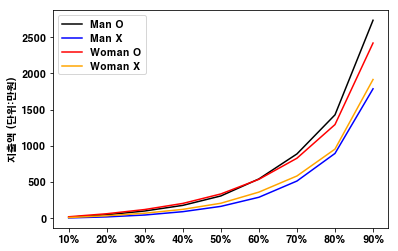

In [76]:
import matplotlib.pyplot as plt

plt.plot(plotManO['TOTAL_SUM_PRICE']/10000,'black',label='Man O') # plotting t, a separately 
plt.plot(plotManX['TOTAL_SUM_PRICE']/10000,'blue',label='Man X') # plotting t, b separately 
plt.plot(plotWomanO['TOTAL_SUM_PRICE']/10000,'red',label='Woman O') # plotting t, c separately 
plt.plot(plotWomanX['TOTAL_SUM_PRICE']/10000,'orange',label='Woman X')
plt.legend()
plt.ylabel('지출액 (단위:만원)')
plt.show()

### 혹시나 이것이 인터넷 사용능력(사용 시간)의 정도에 차이에서 비롯된 것일수도 있기 때문에 검토해봐야!

In [64]:
ONLINE_O['Internet Usage'] = ONLINE_O['J0001']+ONLINE_O['J0002']+ONLINE_O['J0003']+ONLINE_O['J0004']
ONLINE_X['Internet Usage'] = ONLINE_X['J0001']+ONLINE_X['J0002']+ONLINE_X['J0003']+ONLINE_X['J0004']

C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 모바일.인터넷 이용시간은?
#### => 온라인 쇼핑 여부가 "모바일.인터넷 이용시간"에 따라 크게 영향을 받지 않다고 볼 수 있음!

In [69]:
print('온라인 쇼핑남 : ',"%.2f" % ONLINE_O[ONLINE_O['X0001']==1]['Internet Usage'].mean())
print('비온라인 쇼핑남 : ',"%.2f" % ONLINE_X[ONLINE_X['X0001']==1]['Internet Usage'].mean())
print('온라인 쇼핑녀 : ',"%.2f" % ONLINE_O[ONLINE_O['X0001']==2]['Internet Usage'].mean())
print('비온라인 쇼핑녀 : ',"%.2f" % ONLINE_X[ONLINE_X['X0001']==2]['Internet Usage'].mean())

온라인 쇼핑남 :  13.31
비온라인 쇼핑남 :  12.97
온라인 쇼핑녀 :  13.15
비온라인 쇼핑녀 :  12.84


### Shopper들의 연령대는?

In [78]:
# 연령 구분
#1: 13 ~ 18
#2: 19 ~ 24
#3: 25 ~ 34
#4: 35 ~ 44
#5: 45 ~

In [72]:
# 온라인 쇼핑남
ONLINE_O[ONLINE_O['X0001']==1]['X0004'].value_counts(normalize=True)

4    0.316266
3    0.305686
5    0.210790
2    0.123086
1    0.044172
Name: X0004, dtype: float64

In [79]:
# 비온라인 쇼핑남
ONLINE_X[ONLINE_X['X0001']==1]['X0004'].value_counts(normalize=True)

3    0.288517
4    0.206736
2    0.182014
5    0.174400
1    0.148334
Name: X0004, dtype: float64

In [28]:
# 온라인 쇼핑녀
ONLINE_O[ONLINE_O['X0001']==2]['X0004'].value_counts(normalize=True)

3    0.425765
4    0.248144
2    0.178392
5    0.115498
1    0.032202
Name: X0004, dtype: float64

In [30]:
# 비온라인 쇼핑녀
ONLINE_X[ONLINE_X['X0001']==2]['X0004'].value_counts(normalize=True)

3    0.372039
2    0.237417
4    0.166243
5    0.123843
1    0.100458
Name: X0004, dtype: float64

#### 여성의 경우, 온라인쇼핑을 하는 사람이 25~34세 그룹에 집중되어 있음 (42%)
#### 남성의 경우, 비교적 고르게 분포

# 이 밑은 무시...그냥 뭐 있을까 해서 막 뒤져본거라....

In [7]:
b3.head()

,SMS_ID,USER_ID,PANEL_ID,USER_SMSDATE_PRICE,gender,age,Area_Code1,Area_Code2,Area_Name1,Area_Name2,...,CARD_NAME,APPROVAL_DATE,APPROVAL_TIME,APPROVAL_METHOD,IS_FROM,APPROVAL_REAL_PRICE,PRICE,SMS_REGISTRATION_TIMESTAMP,REGISTRATION_TIMESTAMP,ORIGIN_TABLE
0,PIS05154099800841455233116230589,UI005153267849123015839752332480,H0056608,UI005153267849123015839752332480_20181101_3400,1,39,11,27,서울특별시,성북구,...,366901-**-***406,1031.0,2359.0,0,P,3400,3400,2018-11-01 00:00:06.000,2018-11-01 00:00:04.000,Payment_DepositWithdrawal
1,PIS05154099802440155234714902715,UI005153854430751421737596329123,I0167859,UI005153854430751421737596329123_20181101_10020,2,42,14,17,인천광역시,서구,...,NaN,NaN,NaN,0,P,10020,10020,2018-11-01 00:00:26.000,2018-11-01 00:00:20.000,Payment_EasyPay
2,PIS05154099809944455242219203937,UI005153265830843015637924333502,I0512829,UI005153265830843015637924333502_20181101_189000,2,38,12,17,부산광역시,부산진구,...,NaN,NaN,NaN,0,P,189000,189000,2018-11-01 00:01:39.000,2018-11-01 00:01:35.000,Payment_EasyPay
3,PIS05154099813229655245504403191,UI005153353914026624448212034912,S0002313,UI005153353914026624448212034912_20181101_3600,2,41,18,55,경기도,부천시,...,219-038331-12-***,1101.0,2.0,0,P,3600,3600,2018-11-01 00:02:10.000,2018-11-01 00:02:07.000,Payment_DepositWithdrawal
4,PIS05154099818398955250673739546,UI005153275508234116607632787004,P0159882,UI005153275508234116607632787004_20181101_47000,1,38,16,11,대전광역시,대덕구,...,NaN,NaN,NaN,0,P,47000,47000,2018-11-01 00:03:02.000,2018-11-01 00:02:59.000,Payment_EasyPay


#### 구매금액

In [18]:
b3_2['PRICE'].describe()

count    1.319886e+06
mean     2.430569e+05
std      4.329557e+06
min      0.000000e+00
25%      5.100000e+03
50%      1.580000e+04
75%      5.104000e+04
max      1.000000e+09
Name: PRICE, dtype: float64

In [21]:
price1 = b3_2[b3_2['PRICE']<=5100]

price2 = b3_2[b3_2['PRICE']<=15800]
price2 = price2[price2['PRICE']>5100]

price3 = b3_2[b3_2['PRICE']<=51040]
price3 = price3[price3['PRICE']>15800]

price4 = b3_2[b3_2['PRICE']>51040]

In [26]:
price1.head()

,PANEL_ID,PRICE,age
0,H0056608,3400,39
3,S0002313,3600,41
5,H0162332,4500,30
11,I0697840,4900,31
16,I0474632,2500,29
